Part 1: Step 1: 

Code Description: The code gets the html file of the website and parse it into a data frame and then rename some columns.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re 
import numpy as np
from datetime import datetime  
from datetime import timedelta 
from math import exp
import math

In [3]:
page = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')

In [4]:
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

In [6]:
df = df.rename(columns={"Unnamed: 0": "rank", "Unnamed: 1": "flare_classification", "Unnamed: 2": "date", "Region": "flare_region", 
                   "Start": "start_time", "Maximum": "maximum_time", "End": "end_time", "Unnamed: 7": "movie"})
df.index += 1

In [7]:
df

,rank,flare_classification,date,flare_region,start_time,maximum_time,end_time,movie
1,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Step 2: 

Code Description: The code use df operations to combine date and time. Then it drops and renames some columns. Lastly, it convert the 3 columns into datetime type.

In [8]:
df["start_time"] = df["date"] + " " + df["start_time"]

In [9]:
df["maximum_time"] = df["date"] + " " + df["maximum_time"]

In [10]:
df["end_time"] = df["date"] + " " + df["end_time"]

In [11]:
df = df.drop(columns=["movie", "date"])

In [12]:
df = df.rename(columns = {"start_time": "start_datetime", "maximum_time": "max_datetime", "end_time": "end_datetime"})

In [13]:
df['start_datetime']= pd.to_datetime(df['start_datetime']) 
df['max_datetime']= pd.to_datetime(df['max_datetime']) 
df['end_datetime']= pd.to_datetime(df['end_datetime']) 

In [14]:
# change type
df.flare_classification = df.flare_classification.astype('string')

In [15]:
df

,rank,flare_classification,flare_region,start_datetime,max_datetime,end_datetime
1,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
2,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
3,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
4,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
5,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
6,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
7,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
8,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
9,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
10,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


Step 3: 

Code Description: The code first gets the str form of the website's html. And it uses 5 regex to filter out the data step by step. Then it combines the filtered data together.

In [16]:
page1 = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
soup1 = BeautifulSoup(page1.text, 'html.parser')
t = str(soup1.pre)

In [17]:
m = re.findall(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2}).+>(\d+)</a>.+>(\d+)</a>.*\s+(\w+|-{3,6})\s+(\w+|-{3,6})\s+(\w+\.\d?|-{3,6}).+(\d{2}/\d{2}|-{3,6}).+(\d{2}:\d{2}|-{3,6})\s+(\w+|-{3,6})\s+(&?g?t?;?\w+|-{3,6})\s+(?!\d{4}/\d{2}/\d{2}).+>(\d+|-{3,6})</a>.+>PHTX</(?!\d{4}/\d{2}/\d{2})", t)

In [18]:
tb = pd.DataFrame(m, columns =['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency','end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time','cme_angle', 'cme_width', 'cme_speed']) 

In [19]:
x = re.sub(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2}).+>(\d+)</a>.+>(\d+)</a>.*\s+(\w+|-{3,6})\s+(\w+|-{3,6})\s+(\w+\.\d?|-{3,6}).+(\d{2}/\d{2}|-{3,6}).+(\d{2}:\d{2}|-{3,6})\s+(\w+|-{3,6})\s+(&?g?t?;?\w+|-{3,6})\s+(?!\d{4}/\d{2}/\d{2}).+>(\d+|-{3,6})</a>.+>PHTX</(?!\d{4}/\d{2}/\d{2})","", t)

In [20]:
rem = re.findall(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2}).+>(\d+|\?+)</a>.+>(\d+|\?+)</a>.*\s+(\w+\??|-{3,6})\s+(\w+\??|-{3,6})\s+(\w+\.?\d?|-{3,6}).+(\d{2}/\d{2}|--/--).+(\d{2}:\d{2}|--:--)\s+(\w+|-{3,6})\s+(&?g?t?;?\w+|-{3,6})\s+.+(>\d+</a|-{3,6}).+<a href.+PHTX</a>(?!\d{4}/\d{2}/\d{2})", x)

In [21]:
y = re.sub(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2}).+>(\d+|\?+)</a>.+>(\d+|\?+)</a>.*\s+(\w+\??|-{3,6})\s+(\w+\??|-{3,6})\s+(\w+\.?\d?|-{3,6}).+(\d{2}/\d{2}|--/--).+(\d{2}:\d{2}|--:--)\s+(\w+|-{3,6})\s+(&?g?t?;?\w+|-{3,6})\s+.+(>\d+</a|-{3,6}).+<a href.+PHTX</a>(?!\d{4}/\d{2}/\d{2})", "", x)

In [22]:
rem2 = re.findall(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2})\s+(\d+|\?+)\s+(\d+|\?+)\s+(\w+\??|-{3,6})\s+(\w+|-{3,6})\s+(\w+\.?\d?|-{3,6}).+(\d{2}/\d{2}|--/--).+(\d{2}:\d{2}|--:--)\s+(\w+|-{3,6})\s+(&?g?t?;?\w+|-{3,6})\s+.+(>\d+</a|-{3,6}).+<a href.+PHTX</a>(?!\d{4}/\d{2}/\d{2})", y)

In [23]:
z = re.sub(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2})\s+(\d+|\?+)\s+(\d+|\?+)\s+(\w+\??|-{3,6})\s+(\w+|-{3,6})\s+(\w+\.?\d?|-{3,6}).+(\d{2}/\d{2}|--/--).+(\d{2}:\d{2}|--:--)\s+(\w+|-{3,6})\s+(&?g?t?;?\w+|-{3,6})\s+.+(>\d+</a|-{3,6}).+<a href.+PHTX</a>(?!\d{4}/\d{2}/\d{2})", "", y)

In [24]:
rem3 = re.findall(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2}).+>(\d+|\?+)</a>\s+(\d+|\?+)\s+(\w+\??|-.*-)\s*(\w+|-.*-)\s+(\w+\.?\d?|-.*-).+(\d{2}/\d{2}|-.*-).+(\d{2}:\d{2}|-.*-)\s+(\w+|-.*-)\s+(&?g?t?;?\w+|-.*-)\s+.+(>\d+</a|-.*-).+<a href.+PHTX</a>(?!\d{4}/\d{2}/\d{2})", z)

In [25]:
rem4 = re.findall(r"(\d{4}/\d{2}/\d{2}) (\d{2}:\d{2}) (\d{2}/\d{2}) (\d{2}:\d{2}).+>(\d+|\?+)</a>.+>(\d+|\?+)</a>.*\s+(\w+\??|-.*-)\s+(\w+\??|-.*-)\s*(\w+\.?\d?|-.*-).+(\d{2}/\d{2}|-.*-).+(\d{2}:\d{2}|-.*-)\s+(\w+|-.*-)\s+(&?g?t?;?\w+|-.*-)\s+.+>(\d+)</a.+<a href.+PHTX</a>(?!\d{4}/\d{2}/\d{2})", z)

In [26]:
tb1 = pd.DataFrame(rem, columns =['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency','end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time','cme_angle', 'cme_width', 'cme_speed']) 

In [27]:
tb2 = pd.DataFrame(rem2, columns =['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency','end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time','cme_angle', 'cme_width', 'cme_speed']) 

In [28]:
tb3 = pd.DataFrame(rem3, columns =['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency','end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time','cme_angle', 'cme_width', 'cme_speed']) 

In [29]:
tb4 = pd.DataFrame(rem4, columns =['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency','end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_date', 'cme_time','cme_angle', 'cme_width', 'cme_speed']) 

In [30]:
nasa = tb.append([tb1, tb2,tb3, tb4], ignore_index=True)

In [31]:
nasa.sort_values(by=['start_date'], inplace = True)
nasa = nasa.reset_index()

In [32]:
nasa.index += 1

In [33]:
nasa = nasa.drop(columns=["index"])

In [34]:
nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
515,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
516,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
517,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


Step 4:

Code Description: The code first uses regex to replace missing values with NA. And then it combines the date and time columns into datetime columns. And it drops some columns and convert each column into their correct data type. (The code replaces 360h with 360 and increments the date with 24:00 by 1 day and replaces 24:00 with 00:00. 

In [35]:
nasa = nasa.replace(regex={r'-{1,9}': np.nan})

In [36]:
nasa['halo'] = np.where(nasa['cme_angle']=='Halo', True, False)

In [37]:
nasa = nasa.replace(regex= {r'Halo': np.nan})

In [38]:
nasa['cme_width_limit'] = np.where(nasa['cme_width'].str.contains('&gt;'), True, False)

In [39]:
nasa = nasa.replace(regex = {r'&gt;': ''})

In [40]:
nasa["start_time"] = nasa["start_date"] + " " + nasa["start_time"]

In [41]:
nasa['end_time'] = nasa['start_date'].astype(str).str[:5] + nasa['end_date'] + " " + nasa['end_time']

In [42]:
nasa['cme_time'] = nasa['start_date'].astype(str).str[:5]+ nasa['cme_date'] + " " + nasa['cme_time']

In [43]:
nasa['start_time']= pd.to_datetime(nasa['start_time'])

In [44]:
nasa['help'] = np.where(nasa['end_time'].str.contains('24:00'), True, False)

In [45]:
nasa['end_time'] = nasa['end_time'].replace(regex={'24:00': '00:00'})

In [46]:
nasa['end_time']= pd.to_datetime(nasa['end_time'])

In [47]:
nasa['cme_time']= pd.to_datetime(nasa['cme_time'])

In [48]:
nasa['end_time']= np.where(nasa['help']== True, nasa['end_time'] + timedelta(days=1), nasa['end_time'])

In [49]:
nasa = nasa.rename(columns = {"start_time": "start_datetime", "end_time": "end_datetime", "cme_time": "cme_datetime"})

In [50]:
nasa = nasa.drop(columns=["start_date", "end_date", "cme_date", "help"])

In [51]:
nasa = nasa.replace(regex={r'\?{1,9}': np.nan})

In [52]:
nasa = nasa.replace(regex={r'>': ''})

In [53]:
nasa = nasa.replace(regex = {r'</a': ''})

In [54]:
nasa = nasa.replace(regex={r'BACK': np.nan})
nasa = nasa.replace(regex={r'Back': np.nan})
nasa = nasa.replace(regex={r'FILA': np.nan})
nasa = nasa.replace(regex={r'DSF': np.nan})

In [55]:
nasa = nasa.replace(regex={r'360h': '360'}) #no idea how to deal with the h

In [56]:
nasa.start_frequency = pd.to_numeric(nasa.start_frequency).astype('Int64')
nasa.end_frequency = pd.to_numeric(nasa.end_frequency).astype('Int64')
nasa.cme_angle = pd.to_numeric(nasa.cme_angle).astype('Int64')
nasa.cme_speed = pd.to_numeric(nasa.cme_speed).astype('Int64')
nasa.cme_width = pd.to_numeric(nasa.cme_width).astype('Int64')

In [57]:
nasa['flare_location'] = nasa['flare_location'].astype('string')
nasa.flare_region = nasa.flare_region.astype('string')
nasa.flare_classification = nasa.flare_classification.astype('string')

In [58]:
nasa

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,halo,cme_width_limit
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,<NA>,360,878,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,<NA>,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,<NA>,360,1418,True,False
515,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571,True,False
516,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,<NA>,X8.3,2017-09-10 16:00:00,<NA>,360,3163,True,False
517,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


Part 2: Question 1:

Description: I can replicate most of the top 50 solar flare events. But several events on the spaceweather website are missing on the NASA website, which is why I can't get the same data as the spaceweather website. Generally, my code can replicate the SpaceWeatherLive data pretty well despite the missing data. 

In [59]:
q1 = nasa[nasa['flare_classification'].notna()]

In [60]:
q1 = q1[q1['flare_classification'].str.match(r'X.+')]

In [61]:
q1['help'] = pd.to_numeric(q1["flare_classification"].str.split("X", n = 1, expand = True)[1])

In [62]:
q1.sort_values(by=['help', 'start_datetime'], inplace=True, ascending=[False,True])

In [63]:
q1 = q1.drop(columns=['help'])
top50 = q1.head(50).reset_index(drop=True)
top50.index += 1

In [64]:
top50

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,halo,cme_width_limit
1,2003-11-04 20:00:00,2003-11-05 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,<NA>,360,2657,True,False
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,False,False
3,2003-10-28 11:10:00,2003-10-30 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,<NA>,360,2459,True,False
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,False,False
5,2003-10-29 20:55:00,2003-10-30 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,<NA>,360,2029,True,False
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,<NA>,360,1556,True,False
7,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,<NA>,360,1571,True,False
8,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,<NA>,<NA>,<NA>,False,True
9,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,<NA>,360,2598,True,False
10,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,<NA>,X8.3,2017-09-10 16:00:00,<NA>,360,3163,True,False


Question 2: 

Code Description: The similarity function first determines type of the input and thus determine the type of the data. This function then calls one of the three helper functions: cat_flare_similarity(1 if the same, else 0), num_flare_similarity(used for flare_classification, first compare the first level; if the first letter is the same then use exp(-d) to calculate similarity), dat_flare_similarity(convert date difference into seconds and then apply exp(-d) to calculate similarity). 
For determining the best matching entitiy, I use flare_match function which for each entity in top50 table applies the flare_similarity function to get the entity with the max sum of similarity in NASA table. 

In [65]:
def  cat_flare_similarity(e1, e2):
    return 1 if e1 == e2 else 0

def  num_flare_similarity(e1, e2):
    if e1[0] != e2[0]: 
        return 0
    v1 = float(e1[1:].replace('+', ''))
    v2 = float(e2[1:].replace('+', ''))
    return exp(-(v1-v2)**2)

def  dat_flare_similarity(e1, e2):
    return exp(-((e1-e2).total_seconds())**2)

In [66]:
def flare_similarity(e1, e2):
    if type(e1) is pd._libs.missing.NAType or type(e2) is pd._libs.missing.NAType: return 0
    if type(e2) is str:
        return cat_flare_similarity(e1,e2)
    else:
        return dat_flare_similarity(e1,e2)

In [67]:
def flare_match(E1, E2):
    res = [-1]*len(E1.index)
    for i in E1.index:
        maxsim = 0;
        matchindex = ''
        for j in E2.index:
            cur = 0;
            for column in E1: 
                if (column == 'flare_classification'):
                    if not type(E1[column][i]) is pd._libs.missing.NAType and not type(E2[column][j]) is pd._libs.missing.NAType:
                        cur += num_flare_similarity(E1[column][i], E2[column][j])
                else:
                    cur += flare_similarity(E1[column][i], E2[column][j])
            if(cur > maxsim):
                maxsim = cur
                matchindex = j
        if maxsim != 0: 
            res[i-1] = matchindex  
    return res

In [68]:
test_df = df.drop(columns={'rank'})
test_df = test_df.rename(columns={'max_datetime': 'cme_datetime'})
test_nasa = nasa

In [69]:
matched = flare_match(test_df, test_nasa)

In [70]:
df['flare_match'] = matched

In [71]:
df

,rank,flare_classification,flare_region,start_datetime,max_datetime,end_datetime,flare_match
1,1,X28+,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,241
2,2,X20+,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,118
3,3,X17.2+,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,234
4,4,X17+,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,234
5,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,127
6,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,235
7,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,9
8,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,515
9,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,515
10,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,237


Question 3: 

Description:

a. The intent of the plot is to show the end_frequencies of the top50 flares compared to the other flares in the NASA table over start time. We want to observe the variation, spread, skew of the top50 points compared to the rest of the points to see if they show some specific pattern in order to determine if the top50 flares has any end_frequency pattern.

c.The plot uses the dataframe of nasa. It maps start_datetime to x-axis and end_frequency to y-axis. It's geometry is point. And top50 points are blue while others are red.

d. In my plot, the top50 points and the other points demonstrate relatively the same spread along the start_datetime(there is a gap between 2008 mid year and 2010 January.) But the top50 points have relatively low variance at the end_frequency of 0~100 compared to the other points. The distribution of top50 points' end-frequency is left-skewed and the center is close to around 100. 

In [72]:
comp = nasa

In [73]:
newcol = []

In [75]:
for i in comp.index:
    if i in df.flare_match.tolist():
        newcol.append(True)
    else:
        newcol.append(False)

In [76]:
comp['top50'] = newcol

C:\Users\jason\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\jason\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
C:\Users\jason\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


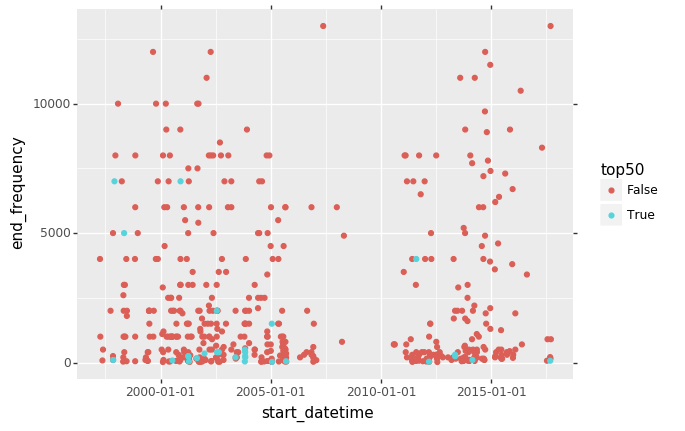

<ggplot: (166748127096)>

In [78]:
from plotnine import *
(ggplot(comp[['start_datetime', 'end_frequency', 'top50']].dropna(), aes(x='start_datetime', y='end_frequency', color = 'top50')) + geom_point()) 